In [3]:
from langchain_ollama import ChatOllama
def multiply(a:int, b:int)-> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a*b


llm = ChatOllama(
    model="phi3:latest",
    temperature=0,
    # other params...
)

llm_with_tools = llm.bind_tools([multiply])

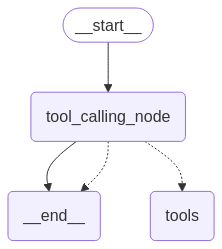

In [4]:
from IPython.display import Image, display
from langgraph.graph import MessagesState, StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

def tool_calling_node(state:MessagesState):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}


builder  = StateGraph(MessagesState)
builder.add_node("tool_calling_node", tool_calling_node)
builder.add_node("tools", ToolNode([multiply]))
builder.add_edge(START, "tool_calling_node")
builder.add_conditional_edges("tool_calling_node", tools_condition)
builder.add_edge("tool_calling_node", END)

graph = builder.compile()


display(Image(graph.get_graph().draw_mermaid_png()))

In [5]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="Helloo hiiii")]
messages = graph.invoke({"messages":messages})

for m in messages['messages']:
    m.pretty_print()

ResponseError: registry.ollama.ai/library/phi3:latest does not support tools (status code: 400)